# importing

In [126]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")

In [145]:
global_temp_df = pd.read_csv('data/global_temp_df.csv')

In [146]:
co2_concentration_df = pd.read_csv('data/co2_concentration_df.csv')

In [147]:
global_temp_df.tail(13)

,dt,LandAndOceanAverageTemperature
1979,2014-12-01,14.410
1980,2015-01-01,14.255
1981,2015-02-01,14.564
1982,2015-03-01,15.193
1983,2015-04-01,15.962
1984,2015-05-01,16.774
1985,2015-06-01,17.390
1986,2015-07-01,17.611
1987,2015-08-01,17.589
1988,2015-09-01,17.049


In [148]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [149]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x: x.replace(day=15))

In [150]:
global_temp_df.tail(13)

,dt,LandAndOceanAverageTemperature
1979,2014-12-15,14.410
1980,2015-01-15,14.255
1981,2015-02-15,14.564
1982,2015-03-15,15.193
1983,2015-04-15,15.962
1984,2015-05-15,16.774
1985,2015-06-15,17.390
1986,2015-07-15,17.611
1987,2015-08-15,17.589
1988,2015-09-15,17.049


In [151]:
co2_concentration_df.head(13)

,datetime,data_mean_global
0,1677-10-15,275.003582
1,1677-11-15,276.008147
2,1677-12-15,276.645443
3,1678-01-15,277.105917
4,1678-02-15,277.488981
5,1678-03-15,277.830969
6,1678-04-15,278.071671
7,1678-05-15,278.016089
8,1678-06-15,277.284444
9,1678-07-15,275.645628


In [152]:
co2_concentration_df['datetime'] = co2_concentration_df['datetime'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [153]:
co2_concentration_df.set_index('datetime', inplace=True)

global_temp_df.set_index('dt', inplace=True)

In [154]:
global_temp_df.index.name = 'datetime'

In [155]:
global_temp_df

,LandAndOceanAverageTemperature
datetime,
1850-01-15,12.833
1850-02-15,13.588
1850-03-15,14.043
1850-04-15,14.667
1850-05-15,15.507
...,...
2015-08-15,17.589
2015-09-15,17.049
2015-10-15,16.290


In [157]:
co2_concentration_df

,data_mean_global
datetime,
1677-10-15,275.003582
1677-11-15,276.008147
1677-12-15,276.645443
1678-01-15,277.105917
1678-02-15,277.488981
...,...
2014-08-15,394.573461
2014-09-15,395.026810
2014-10-15,396.668760


In [158]:
year_1900 = datetime.datetime.strptime('1900-01-01', '%Y-%m-%d')

In [159]:
co2_temp = pd.merge(global_temp_df, co2_concentration_df, left_on='datetime', right_on='datetime')

In [160]:
co2_temp

,LandAndOceanAverageTemperature,data_mean_global
datetime,,
1850-01-15,12.833,284.944656
1850-02-15,13.588,285.333792
1850-03-15,14.043,285.682825
1850-04-15,14.667,285.931179
1850-05-15,15.507,285.885928
...,...,...
2014-08-15,17.607,394.573461
2014-09-15,16.975,395.026810
2014-10-15,16.029,396.668760


In [161]:
co2_temp.describe()

,LandAndOceanAverageTemperature,data_mean_global
count,1980.000000,1980.000000
mean,15.207438,315.966261
std,1.272947,29.578805
min,12.475000,281.901051
25%,14.043750,292.672647
50%,15.248500,307.565362
75%,16.395000,329.140279
max,17.609000,399.179692


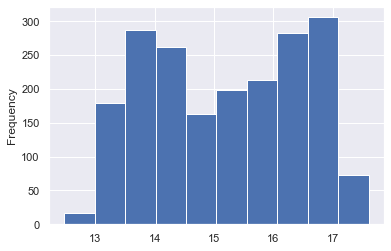

In [162]:
co2_temp['LandAndOceanAverageTemperature'].plot.hist()

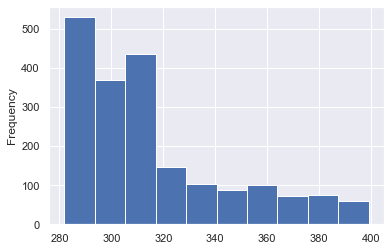

In [163]:
co2_temp['data_mean_global'].plot.hist()

In [164]:
corrSeries = co2_temp['data_mean_global'].rolling(window=32).corr(co2_temp['LandAndOceanAverageTemperature'])

In [165]:
corrSeries.describe()

count    1949.000000
mean       -0.458905
std         0.078051
min        -0.682973
25%        -0.512988
50%        -0.460974
75%        -0.412265
max        -0.157244
dtype: float64

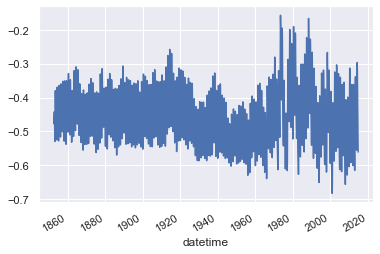

In [166]:
corrSeries.plot()

In [167]:
co2_temp['data_mean_global'].corr(co2_temp['LandAndOceanAverageTemperature'])

0.18467125422742856

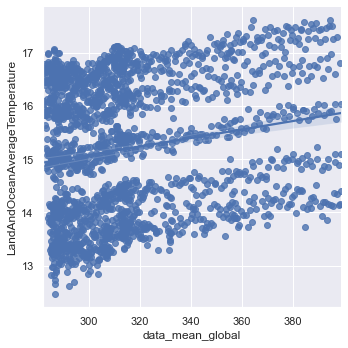

In [168]:
sns.lmplot(y='LandAndOceanAverageTemperature', x='data_mean_global', data =co2_temp)

In [169]:
co2_temp.columns = ['Global Temperature (ºC)', 'CO2 concentration']

In [ ]:
plt.subplots(figsize=(20,10))

plt.title('global temp and co2 conc')

ax = sns.lineplot(data=co2_temp,ci=40, lw=3)

#ax.set(xlabel='Year', ylabel='Land Average Temperature (ºC)')

#plt.savefig('co2_temp.pdf')

plt.show()